In [12]:
!pip install tensorflow
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/05/8e/8de486cbd03baba4deef4142bd643a3e7bbe954a784dc1bb17142572d127/packaging-21.3-py3-none-any.whl
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=d1fef1af62662d46afe7a44fc737dcb17ffceb28c3f14d2290e4997aa6b4a100
  Stored in directory: C:\Users\drizi\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: importlib-metadata 1.4.0
    Uninstalling importlib-metadata-1.4.0:
      Successfully uninstalled importlib-metadata-1.4.0


In [17]:
!pip install Pillow

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import numpy as np
from tensorflow import keras
from sklearn.metrics import classification_report

# Imports

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image

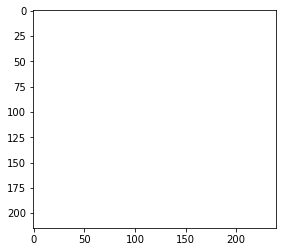

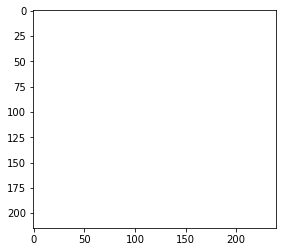

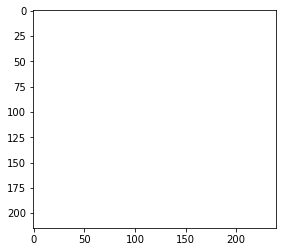

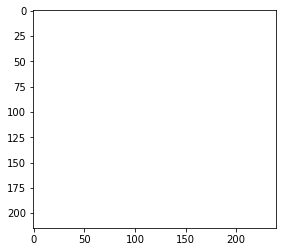

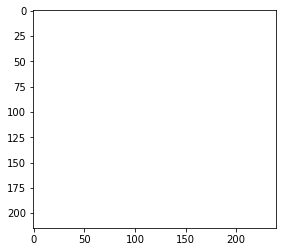

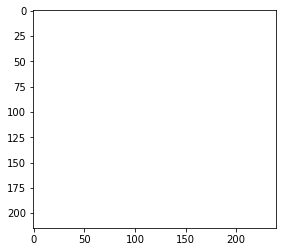

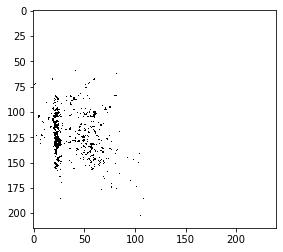

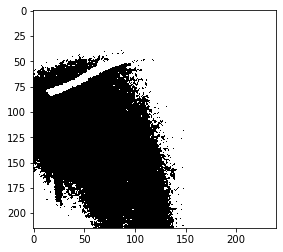

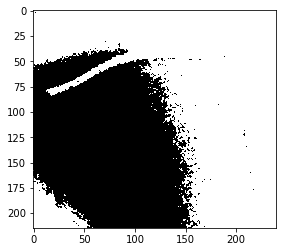

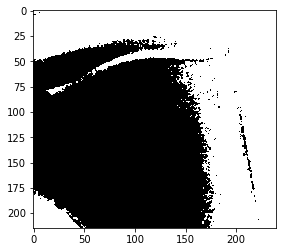

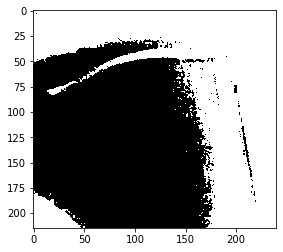

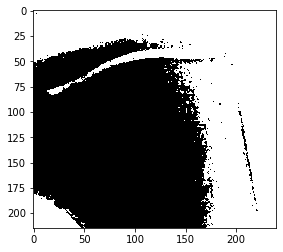

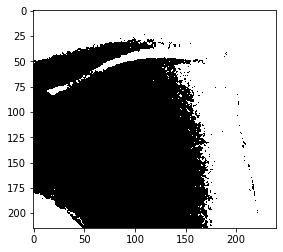

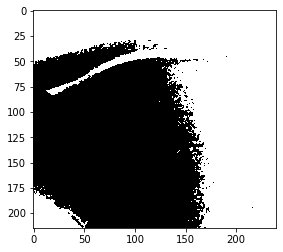

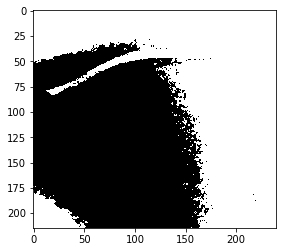

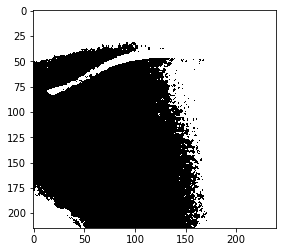

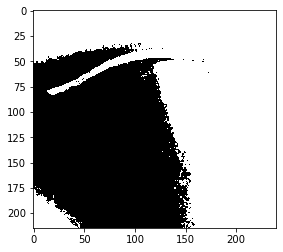

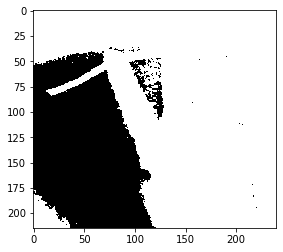

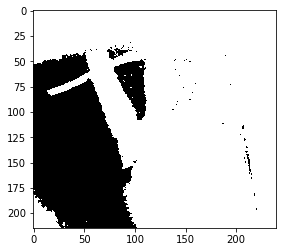

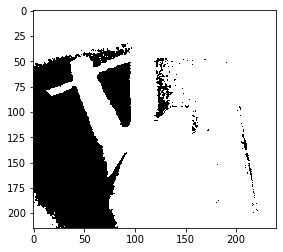

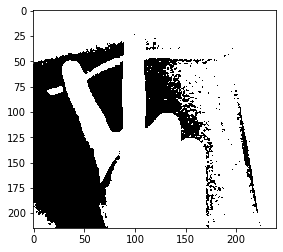

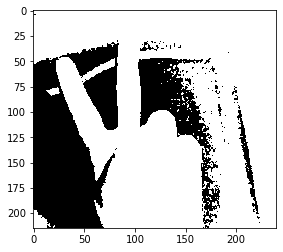

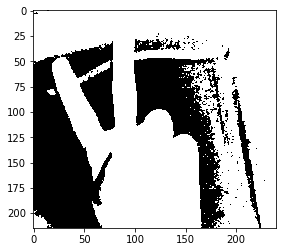

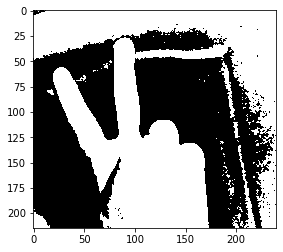

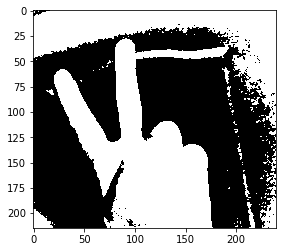

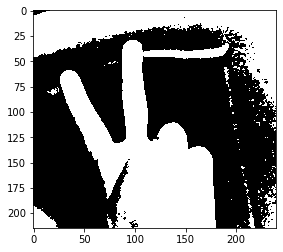

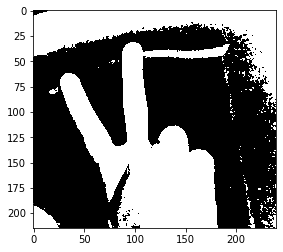

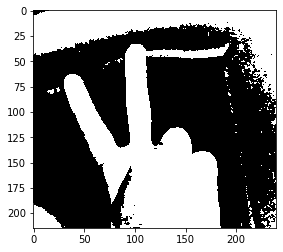

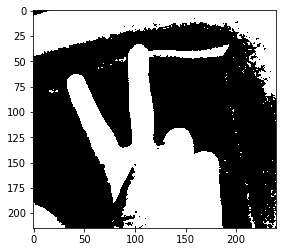

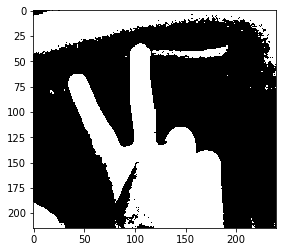

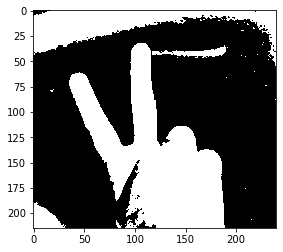

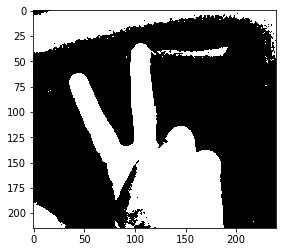

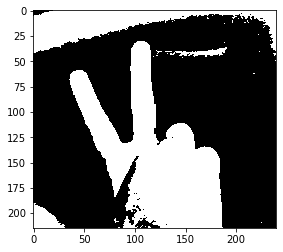

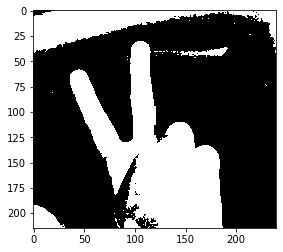

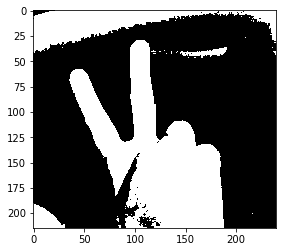

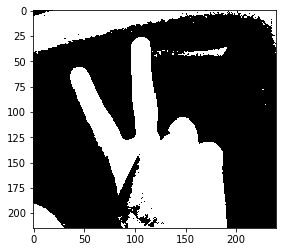

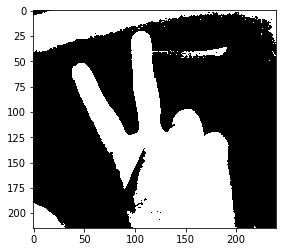

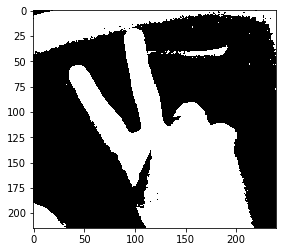

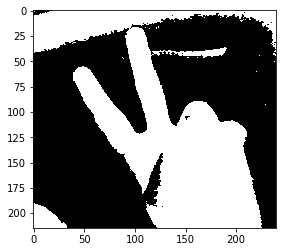

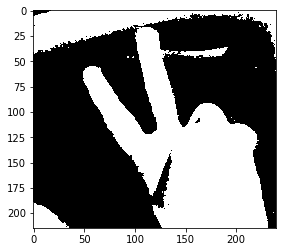

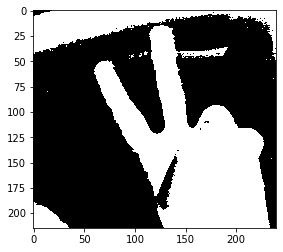

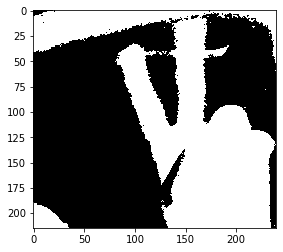

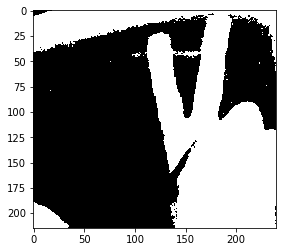

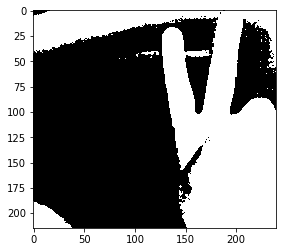

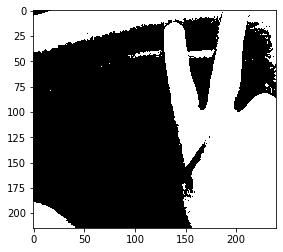

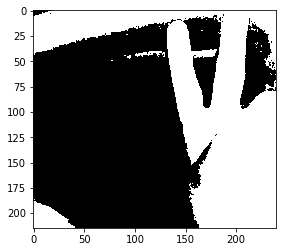

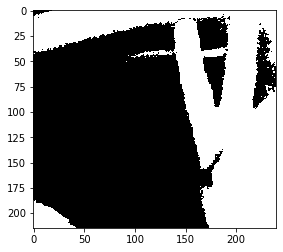

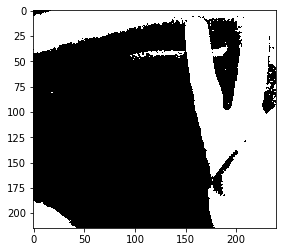

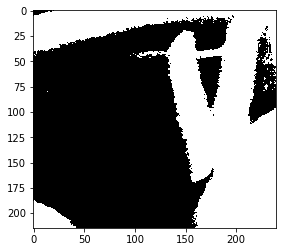

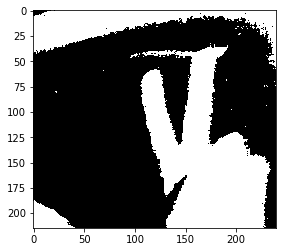

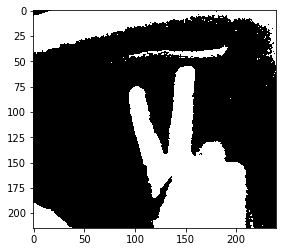

In [2]:
#test only

#index depends on your camera
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)

top, right, bottom, left = 10, 350, 225, 590

i = 0
while cap.isOpened():
    image, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    binary_image = cv2.Canny(gray, 100, 200)
    thresh = cv2.threshold(gray, 135, 255, cv2.THRESH_BINARY)[1]
    
    crp_img = thresh[top:bottom,right:left]
    cv2.imwrite("saves/{i}.jpg", crp_img)

    plt.imshow(crp_img, cmap='Greys',  interpolation='nearest')
    plt.show()
    cv2.rectangle(frame, (right,top), (left,bottom), (255, 255, 255), 2)
    cv2.imshow("image",frame)
    if (cv2.waitKey(1) & 0xFF == ord('q')): break
    i+=1
    if (i>50): break
cap.release()
cv2.destroyAllWindows()

In [27]:
model = keras.models.load_model("./FinalModel/GestureRecognitionModel.tfl")

def resizeImage(imageName):
    finalwidth = 50
    img = Image.open(imageName)
    wpercent = (finalwidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((finalwidth,hsize), Image.ANTIALIAS)
    img.save(imageName)
    
def getPrediction():
    img = cv2.imread('temp.png')
    bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    prediction = model.predict([bw_img.reshape(50,50,1)])
    return np.argmax(prediction), (np.amax(prediction) / (prediction[0][0] + prediction[0][1] + prediction[0][2]))

def showStatistics(predictedClass, confidence):
    textImage = np.zeros((300,512,3), np.uint8)
    className = ""

    if predictedClass == 0:
        className = "OK sign"
    elif predictedClass == 1:
        className = "L sign"
    elif predictedClass == 2:
        className = "Victory sign"
    elif predictedClass == 3:
        className = "Fingers crossed"
    elif predictedClass == 4:
        className = "Thumbs up"

    cv2.putText(textImage,"Pedicted Class : " + className, 
    (30, 30), 
    cv2.FONT_HERSHEY_SIMPLEX, 
    1,
    (255, 255, 255),
    2)

    cv2.putText(textImage,"Confidence : " + str(confidence * 100) + '%', 
    (30, 100), 
    cv2.FONT_HERSHEY_SIMPLEX, 
    1,
    (255, 255, 255),
    2)
    cv2.imshow("Statistics", textImage)

def main():
    #index depends on your devices
    #cap = cv2.VideoCapture(0)
    cap = cv2.VideoCapture(1)
    
    #define frame corners
    #top, right, bottom, left = 10, 350, 225, 590
    top, right, bottom, left = 10, 350, 260, 600
    
    i=0 #number of images
    
    while cap.isOpened() :
        image, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        binary_image = cv2.Canny(gray, 100, 200)
        thresh = cv2.threshold(gray, 135, 255, cv2.THRESH_BINARY)[1]
    
        cv2.imwrite('temp_full.png', thresh)
        crp_img = thresh[top:bottom,right:left]
        
        cv2.imwrite('temp.png', crp_img)
        resizeImage('temp.png')
        
        prediction, confidence = getPrediction()
        showStatistics(prediction, confidence)
        cv2.imshow("After processing", 'temp.png')
        
        cv2.rectangle(frame, (right,top), (left,bottom), (255, 255, 255), 2)
        cv2.imshow("image",frame)
        
        if (cv2.waitKey(1) & 0xFF == ord('q')): break
        i+=1
        if (i>50): break
            
    camera.release()
    #cv2.destroyAllWindows()
    
main()

C:\Users\drizi\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


ValueError: in user code:

    File "C:\Users\drizi\Miniconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\drizi\Miniconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\drizi\Miniconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\drizi\Miniconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\drizi\Miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "conv2d_38" (type Conv2D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_38/conv2d_38/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true](sequential_38/rescaling_39/add, sequential_38/conv2d_38/Conv2D/ReadVariableOp)' with input shapes: [?,50,1,1], [3,3,1,2].
    
    Call arguments received by layer "conv2d_38" (type Conv2D):
      • inputs=tf.Tensor(shape=(None, 50, 1, 1), dtype=float32)
